In [20]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [24]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [27]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


# 범주형 데이터

In [28]:
#df의 첫 5행을 확인해봅시다. 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
grouped = df['tip'].groupby(df['sex'])

grouped.mean() # 성별에 따른 팁의 평균

grouped.size() # 성별에 따른 데이터 량(팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

In [30]:
import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [33]:
x = list(sex.keys())  
x


['Male', 'Female']

In [32]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

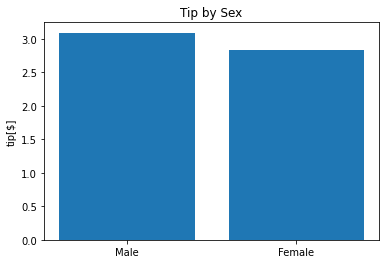

In [34]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

<AxesSubplot:xlabel='sex', ylabel='tip'>

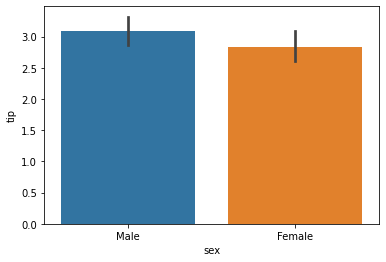

In [35]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

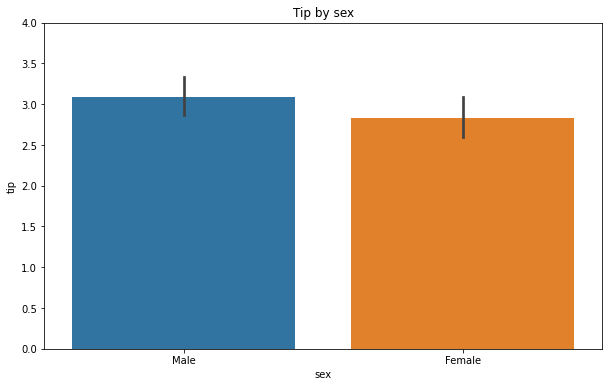

In [36]:
plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

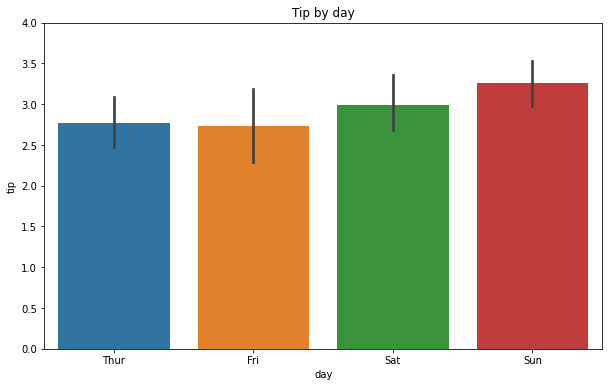

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

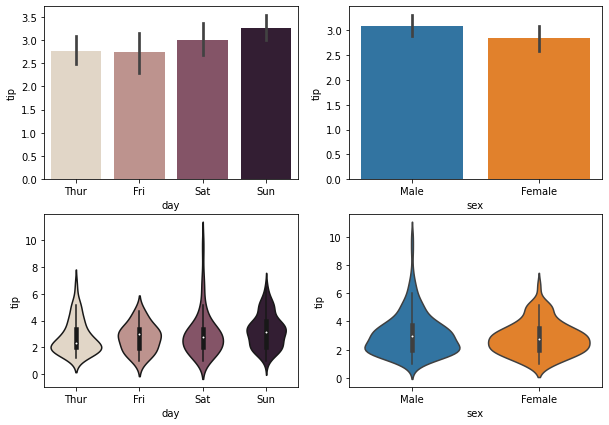

In [38]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip',palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip',palette="ch:.25")

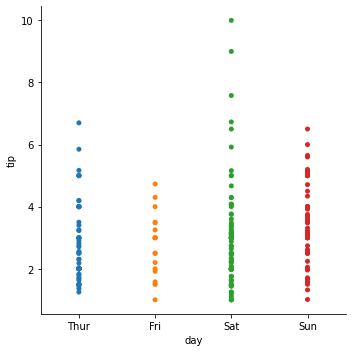

In [39]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

# 수치형 데이터

## 산점도

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

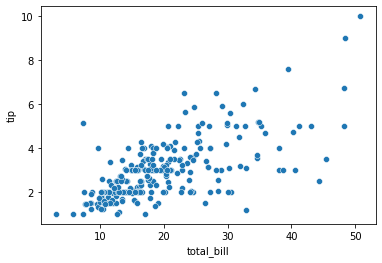

In [40]:
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

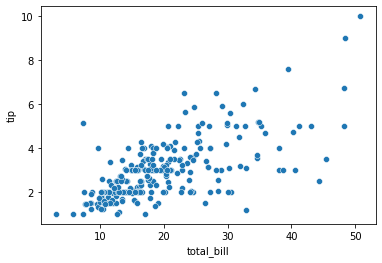

In [41]:
sns.scatterplot(data=df , x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

## 선 그래프

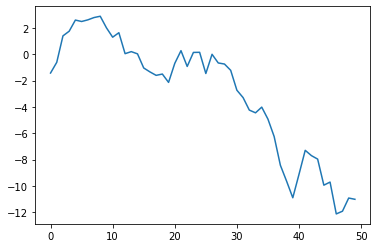

In [42]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다. 
#cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())

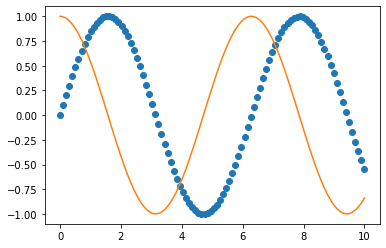

In [43]:
x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

<AxesSubplot:>

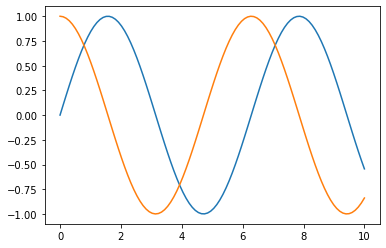

In [44]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

## 히스토그램

### 히스토그램 연습

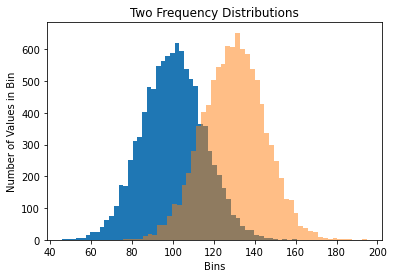

In [45]:
#그래프 데이터 
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False) #bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom') # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left') #y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

## 예제에 히스토그램 쓰기

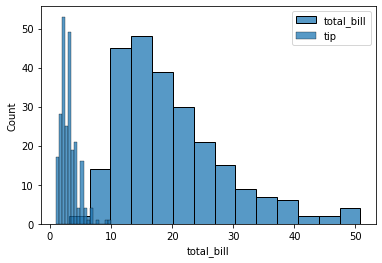

In [46]:
sns.histplot(df['total_bill'], label = "total_bill")
sns.histplot(df['tip'], label = "tip").legend()# legend()를 이용하여 label을 표시해 줍니다.

<AxesSubplot:>

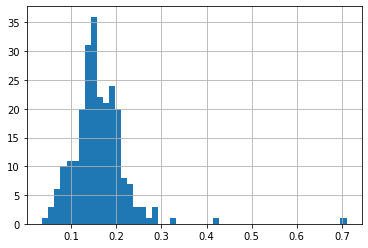

In [47]:
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

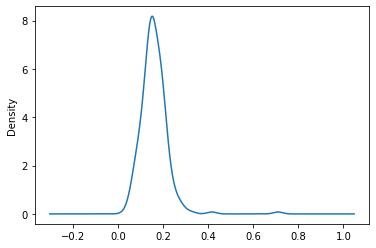

In [48]:
df['tip_pct'].plot(kind='kde')

## 시계열 데이터 시각화

In [50]:
csv_path = "flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

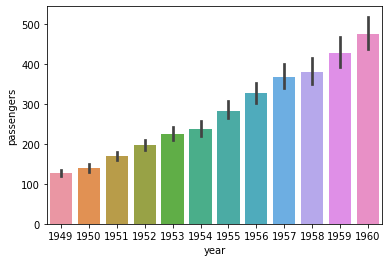

In [52]:
sns.barplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

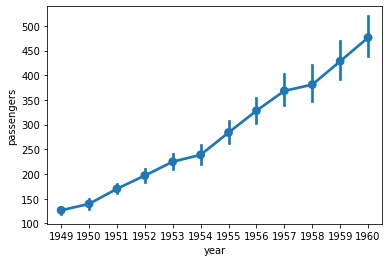

In [53]:
sns.pointplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

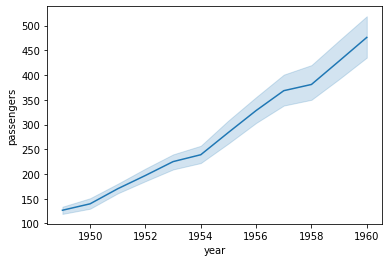

In [54]:
sns.lineplot(data=flights, x='year', y='passengers')

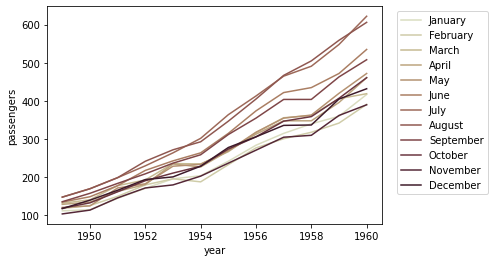

In [55]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

<AxesSubplot:xlabel='passengers', ylabel='Count'>

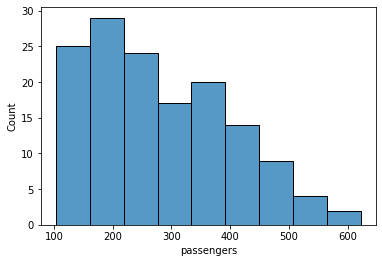

In [56]:
sns.histplot(flights['passengers'])

## Heatmap

In [57]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

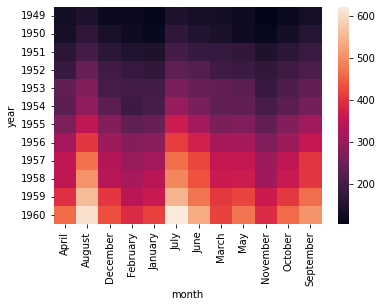

In [58]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

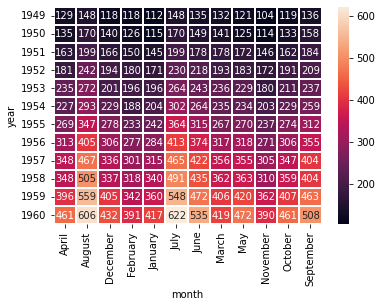

In [59]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

<AxesSubplot:xlabel='month', ylabel='year'>

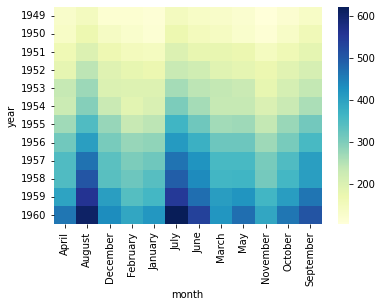

In [60]:
sns.heatmap(pivot, cmap="YlGnBu")